In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.patches import Wedge

In [4]:
%run ../python_scripts/tools.py
font_setup(size=26)

In [5]:
def tov(cn):
    return np.array([cn.real,cn.imag])
def atob(a,b):
    return np.array([i for i in zip(tov(a),tov(b))])
def mid(a,b):
    return 0.5*(a+b)
def perp(a,b,s=1):
    return mid(a,b) + s*(mid(a,b)-a)*1j
def cmod(a):
    return (a*a.conj()).real**0.5

In [6]:
def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x+y*1j
    
def inter_c(points):
    return intersection(
        line(tov(points[0]),tov(points[1])),
        line(tov(points[2]),tov(points[3]))
    )    

In [7]:
@interact
def comp(
    alpha = widgets.FloatSlider(min=0,max=2*np.pi,value = 2),
    beta = widgets.FloatSlider(min=0,max=2*np.pi,value = 2.8),
    gamma = widgets.FloatSlider(min=0,max=4*np.pi,value = 2,step=0.1),
    delta = widgets.FloatSlider(min=0,max=4*np.pi,value = 2.8,step=0.1)
):        
    circ = np.exp(1j*np.linspace(0,2*np.pi,100))
    plot(circ.real,circ.imag,'--',c='#808791')    
    
    c0 = 2+2j

    a = np.exp(1j*alpha) + c0
    b = np.exp(1j*beta) + c0
    z = 1.7*np.exp(1j*gamma) + c0

    m1 = mid(a,b)
    p1 = perp(a,b,-1)
    m2 = mid(b,z)
    p2 = perp(b,z,-1)
    #plot(*atob(m1,p1),'#808791')
    #plot(*atob(m2,p2),'#808791')
    plot(*tov(c0),'kx')
    
    c = inter_c([m1,p1,m2,p2])
    if cmod(c-c0)<2:
        plot(*tov(c),'*',c='C2')
        text(*tov(c),"O'")
    
    ncirc = circ*cmod(c-a) + c
    plot(ncirc.real,ncirc.imag,'-.')    

    zz = c + np.exp(1j*delta)*cmod(c-a)
    points = [0,a,b,z,zz]
    txt = ['O','a','b','z','z\'']
    tloc = np.array([-.05-0.05j,.05,-.07,.05,.05])*3
    clrs = ['k','k','k','k','C4']
    
    plot(*atob(a,z),c='#606a78')
    plot(*atob(b,z),'--',c='#606a78')
    plot(*atob(a,zz),c='C4')
    plot(*atob(b,zz),'--',c='C4')
    
    if cmod(zz-c0)>2:
        points = points[:-1]
        txt = txt[:-1]
        tloc = tloc[:-1]
        clrs = clrs[:-1]
    
    [plot(*tov(i),'o',c=c) for i,c in zip(points,clrs)]    
    [text(*tov(i+l),t,ha='center',va='center') for i,t,l in zip(points,txt,tloc)]
    
    v = ((z-a)/(z-b))
    vv = ((zz-a)/(zz-b))
    t = v.imag/v.real
    tt = vv.imag/vv.real

    jb = (z-b)/cmod(z-b)
    ja = (z-a)/cmod(z-a)
    kb = (zz-b)/cmod(zz-b)
    ka = (zz-a)/cmod(zz-a)
    plot(*atob(0,ja),'k')
    plot(*atob(0,jb),'k--')
    plot(*atob(0,ka),c='#a61dcc')
    plot(*atob(0,kb),'--',c='#a61dcc')
    #text(*tov(zz-b+.1+0.1j)/cmod(zz-b),"z'-b")
    
    ww = Wedge((0,0), 1, np.angle(kb,True),np.angle(ka,True),color='#a61dcc',alpha=0.5)
    w = Wedge((0,0), 1, np.angle(jb,True),np.angle(ja,True),color='C1',alpha=0.5)
    w0 = Wedge((0,0), 1,0, -np.angle(kb,True)+np.angle(ka,True),color='C2',alpha=0.3)
    
    ax = gca()
    ax.add_patch(w)
    ax.add_patch(ww)
    ax.add_patch(w0)
    
    axvline(0,c='#606a78')
    axhline(0,c='#606a78')

    gca().set_aspect(1)
    gcf().set_size_inches([10,10])
    axis('off')
    xlim(-1.2,4)
    ylim(-1.2,4)

interactive(children=(FloatSlider(value=2.0, description='alpha', max=6.283185307179586), FloatSlider(value=2.…

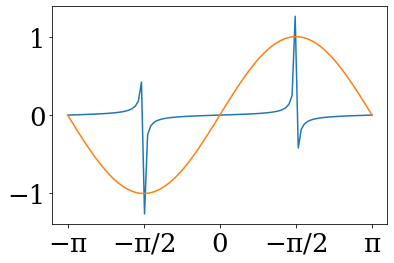

In [8]:
t = np.linspace(-np.pi,np.pi,100)
plot(t,np.tan(t)/50)
plot(t,np.sin(t))
_ = xticks(np.array([-1,-.5,0,0.5,1])*np.pi,['$-\pi$','$-\pi/2$',0,'$-\pi/2$','$\pi$'])